__Context__


According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

__Attribute Information__

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
# importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df_copy=df.copy()

In [4]:
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
# Print test Data Frame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.drop(columns=['id']).describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# data analytics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
# Finding missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['Count', 'percentages' ]
missing.sort_values(by='Count')

,Count,percentages
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


In [9]:
# Imputing the missing values with the mean
df=df.fillna(np.mean(df['bmi']))

In [10]:
# Finding missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['Count', 'percentages' ]
missing.sort_values(by='Count')

,Count,percentages
id,0,0.0
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0
bmi,0,0.0


In [11]:
duplicates = df.duplicated(subset='id')
df[duplicates]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [12]:
# Classifying data into numerical and categorical variables.
df_num=df[['age','avg_glucose_level','bmi']]
df_cat=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

In [13]:
# The target variable is the stroke. Let's chek the distribuition of the target
df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

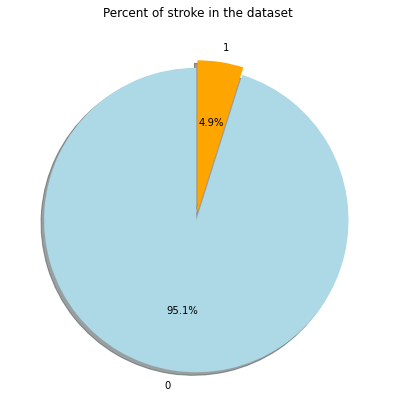

In [14]:
# # visuallization of the diagnosis distribuition
# # Pie chart representation
# pie_labels = ['Stroke', 'NO_stroke']

# #Number of benign and malignant cases
# pie_y = df['stroke'].value_counts()

# pie_explode = [0, 0.1]
# ]

# plt.figure(figsize=(10, 8))
# plt.pie(pie_y, labels=pie_labels, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 14})
# plt.legend()
# plt.title("Percent of Cases in the Data")
# plt.show()
#Plotting the output column in a pie chart
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","Orange"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Percent of stroke in the dataset')
plt.show()

__Observations__

Very small percent of strokes in this dataset

In [15]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

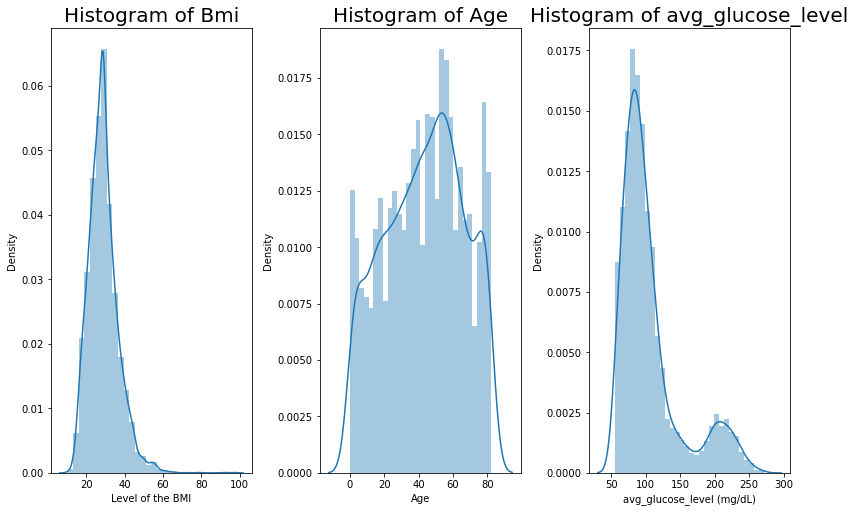

In [16]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(df.bmi,
          title='Bmi',
          xlabel="Level of the BMI",
          ax=axes[0])
plot_hist(df.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(df.avg_glucose_level,
          title='avg_glucose_level', 
          xlabel='avg_glucose_level (mg/dL)',
          ax=axes[2])

plt.show()

In [17]:
skewed=['bmi', 'avg_glucose_level']

In [18]:
for col in skewed:
    df[col] = np.log(df[col])

In [19]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

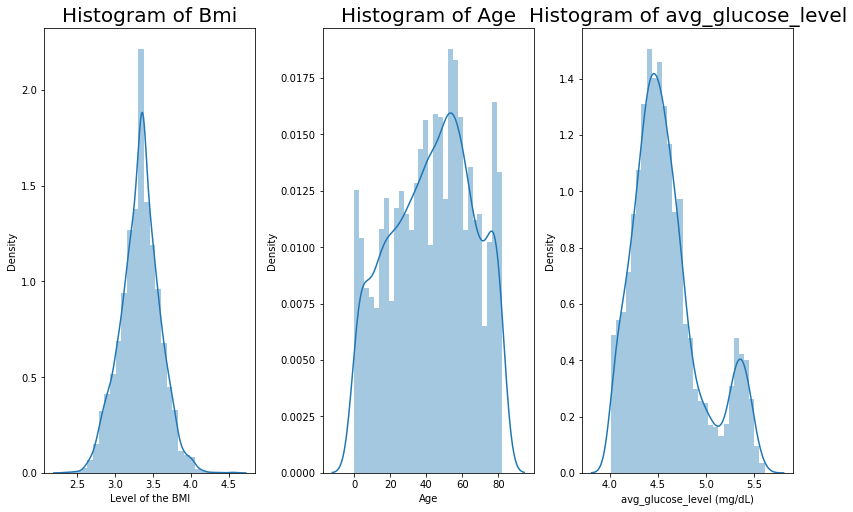

In [20]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(df.bmi,
          title='Bmi',
          xlabel="Level of the BMI",
          ax=axes[0])
plot_hist(df.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(df.avg_glucose_level,
          title='avg_glucose_level', 
          xlabel='avg_glucose_level (mg/dL)',
          ax=axes[2])

plt.show()

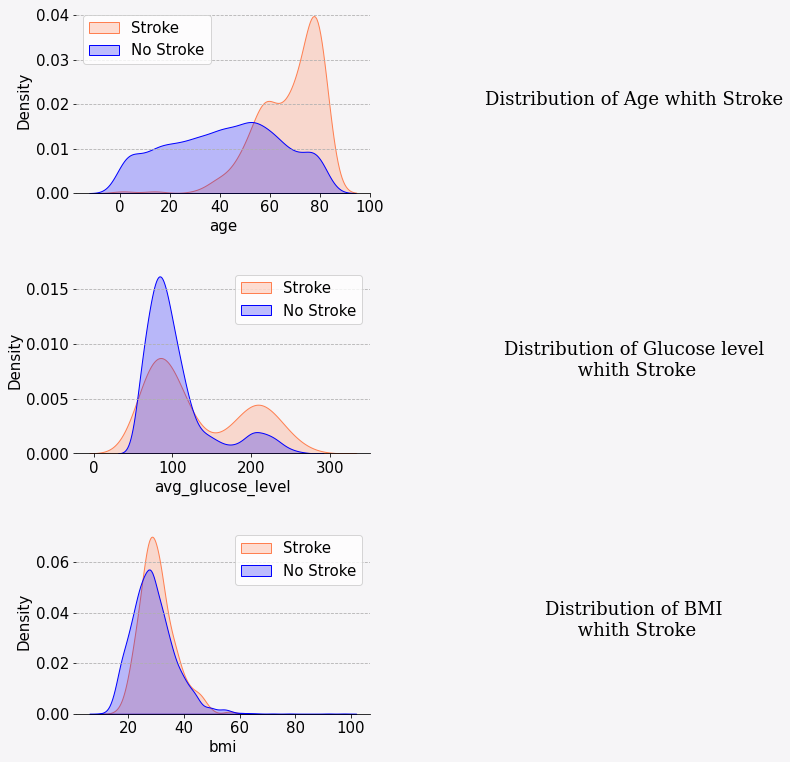

In [182]:
fig = plt.figure(figsize=(20,13))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
axes=[ax0,ax1,ax2,ax3,ax4,ax5]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
sns.kdeplot(ax=ax0,x=df.loc[df['stroke']==1]['age'],color='coral',label='Stroke',shade=True)
sns.kdeplot(ax=ax0,x=df.loc[df['stroke']==0]['age'],color='blue',label='No Stroke',shade=True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--', axis='y')

ax1.text(0.5,0.5,'Distribution of Age whith Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')

sns.kdeplot(ax=ax2,x=df.loc[df['stroke']==1]['avg_glucose_level'],color='coral',label='Stroke',shade=True)
sns.kdeplot(ax=ax2,x=df.loc[df['stroke']==0]['avg_glucose_level'],color='blue',label='No Stroke',shade=True)
ax2.legend(loc = 'upper right')
ax2.grid(linestyle='--', axis='y')

ax3.text(0.5,0.5,'Distribution of Glucose level\n whith Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')


sns.kdeplot(ax=ax4,x=df.loc[df['stroke']==1]['bmi'],color='coral',label='Stroke',shade=True)
sns.kdeplot(ax=ax4,x=df.loc[df['stroke']==0]['bmi'],color='blue',label='No Stroke',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')
ax5.text(0.5,0.5,'Distribution of BMI\n whith Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')
# removing labels

axes1=[ax1,ax3,ax5]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)
# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)

In [21]:
#  numerical features

features=list(df_num)
dfys=df[df['stroke'] ==1]
dfns=df[df['stroke'] ==0]

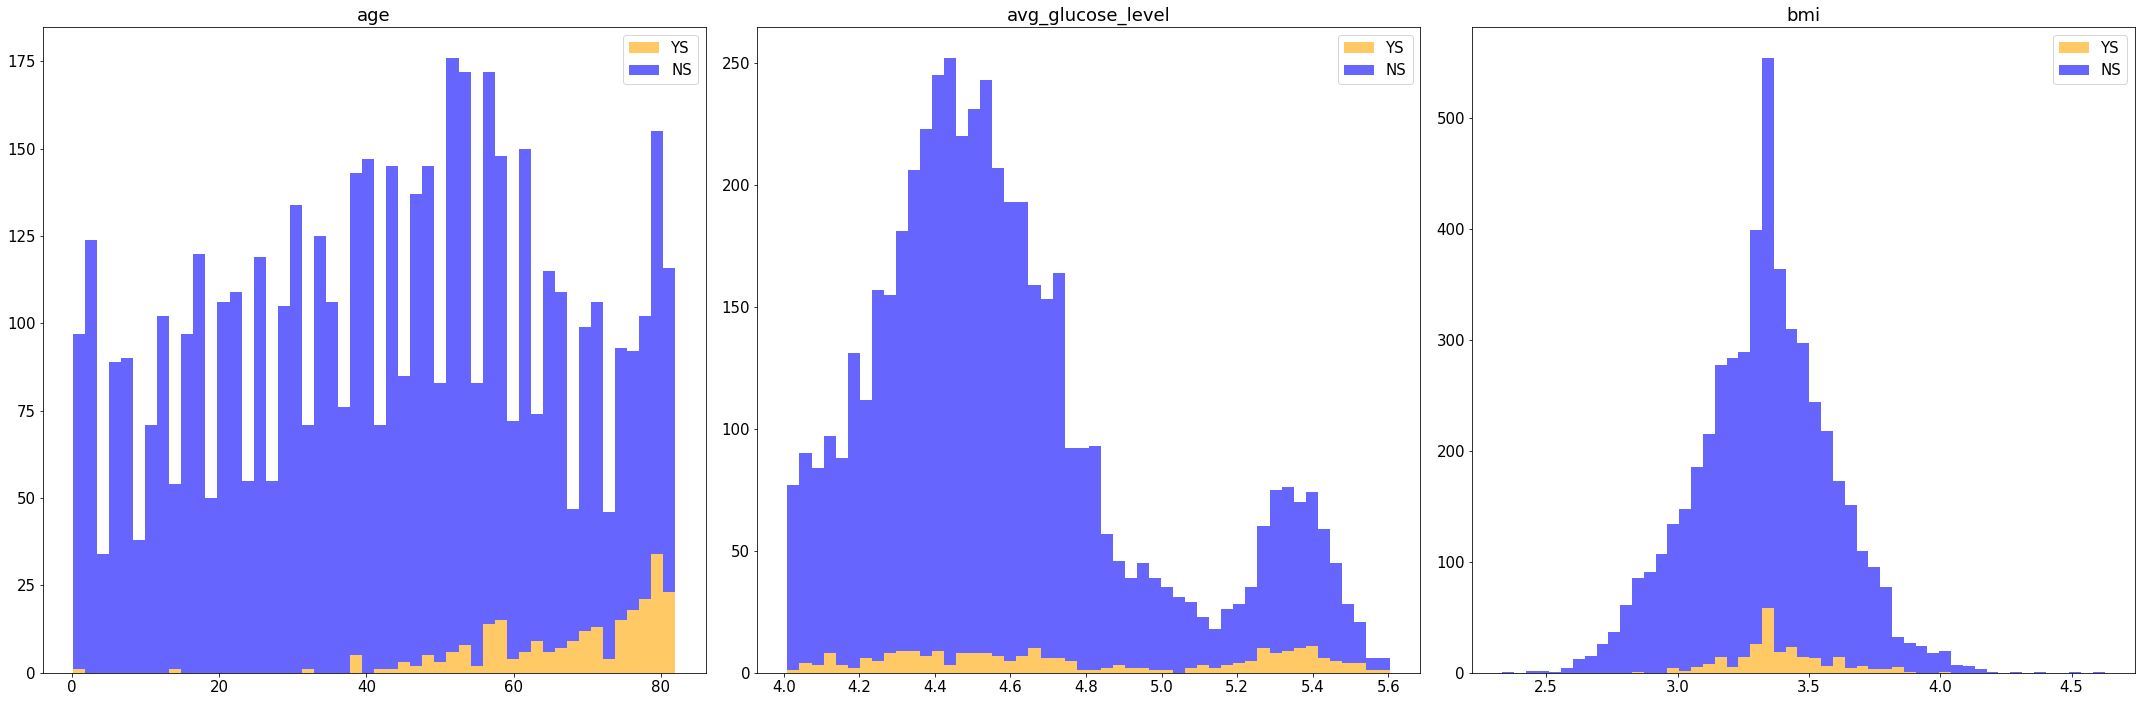

In [22]:
#Stack the data
plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features[idx]]) - min(df[features[idx]]))/50
    ax.hist([dfys[features[idx]],dfns[features[idx]]], bins=np.arange(min(df[features[idx]]), max(df[features[idx]]) + binwidth, binwidth) , alpha=0.6, stacked=True, label=['YS','NS'],color=['Orange', 'Blue'])
    ax.legend(loc='upper right')
    ax.set_title(features[idx])
plt.tight_layout()
plt.show()

In [27]:
df=df_copy.copy()

In [24]:
y = df['stroke']
x = df_num

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x], axis=1)
df = pd.melt(df, id_vars="stroke",
                    var_name="features",
                    value_name='value')

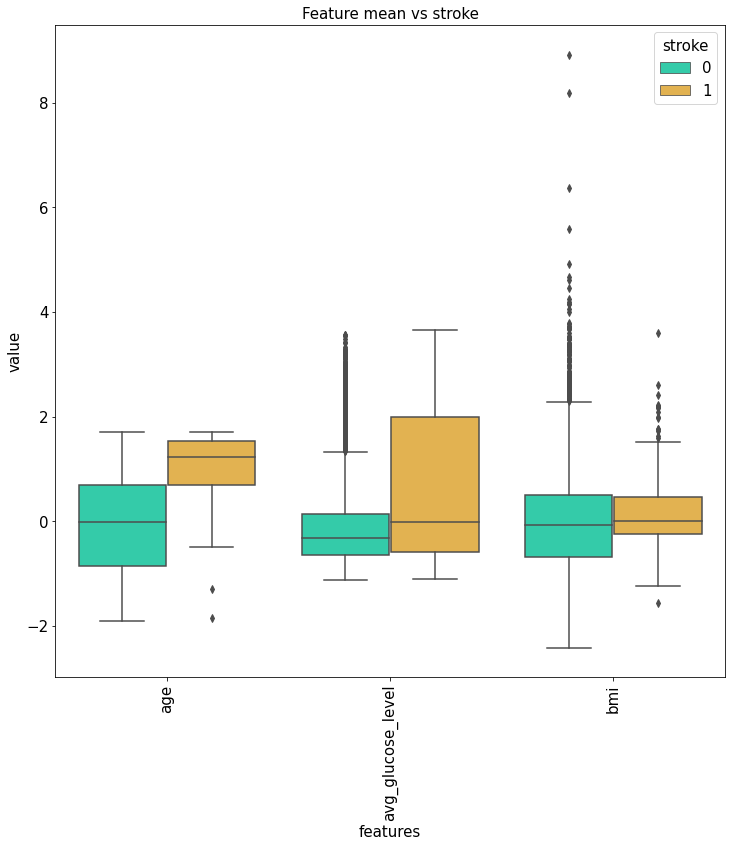

In [25]:
plt.figure(figsize=(12, 12))
sns.boxplot(x="features", y="value", hue="stroke", data=df, palette = 'turbo')
plt.title('Feature mean vs stroke', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='smoking_status', ylabel='age'>

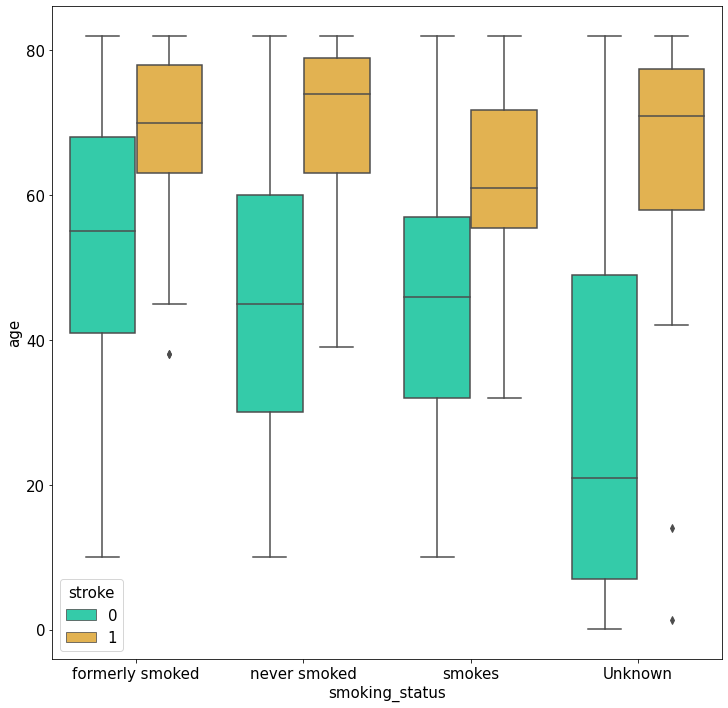

In [28]:
plt.figure(figsize=(12,12))
sns.boxplot(y='age', x='smoking_status',hue='stroke' ,data=df, palette = 'turbo')

<AxesSubplot:xlabel='ever_married', ylabel='age'>

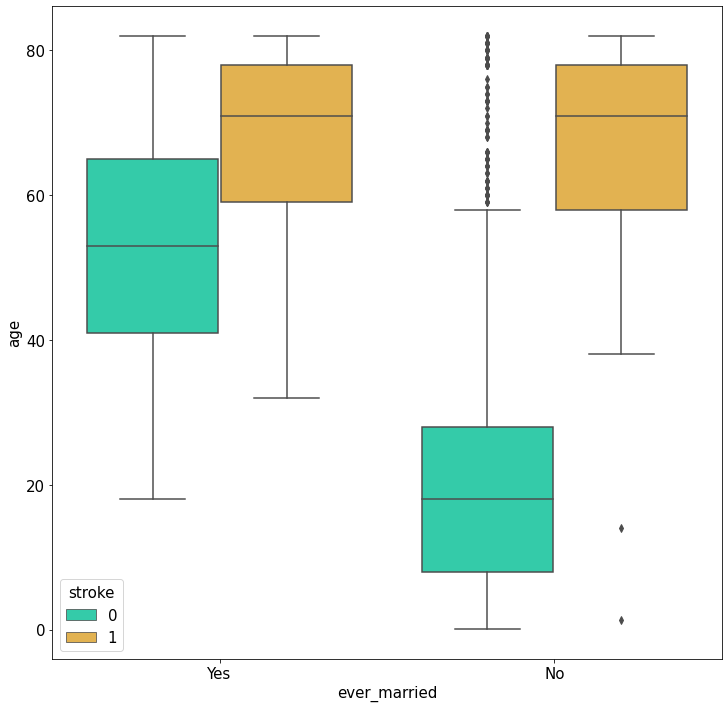

In [196]:
plt.figure(figsize=(12,12))
sns.boxplot(y='age', x='ever_married',hue='stroke' ,data=df, palette = 'turbo')

In [ ]:
# df_cat=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
#                        'smoking_status', 'stroke']]

<AxesSubplot:xlabel='hypertension', ylabel='age'>

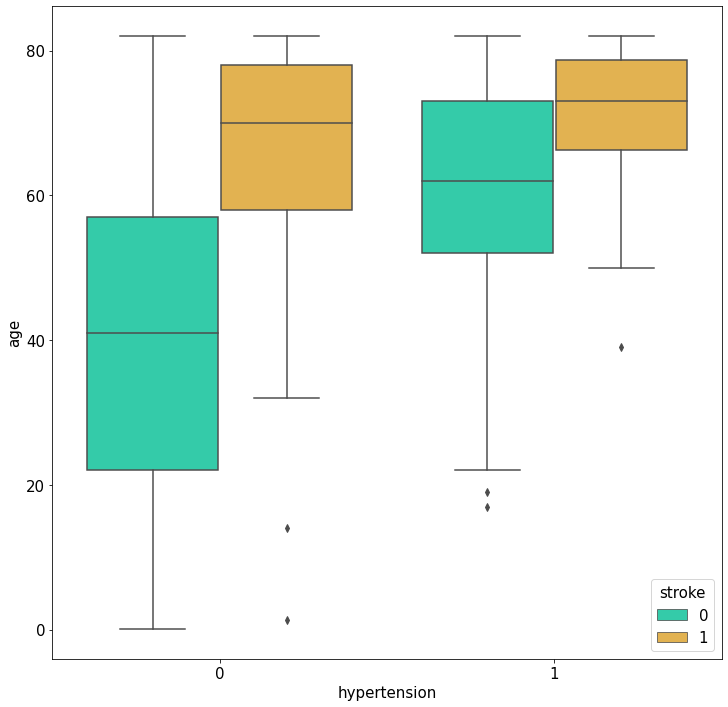

In [119]:
plt.figure(figsize=(12,12))
sns.boxplot(y='age', x='hypertension',hue='stroke' ,data=df, palette = 'turbo')

<AxesSubplot:xlabel='work_type', ylabel='age'>

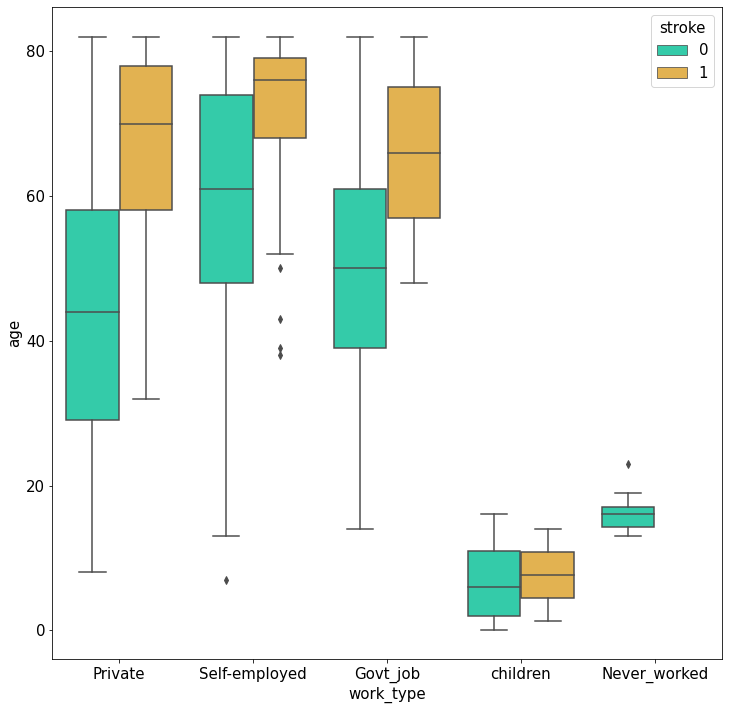

In [122]:
plt.figure(figsize=(12,12))
sns.boxplot(y='age', x='work_type',hue='stroke' ,data=df, palette = 'turbo')

<AxesSubplot:xlabel='Residence_type', ylabel='age'>

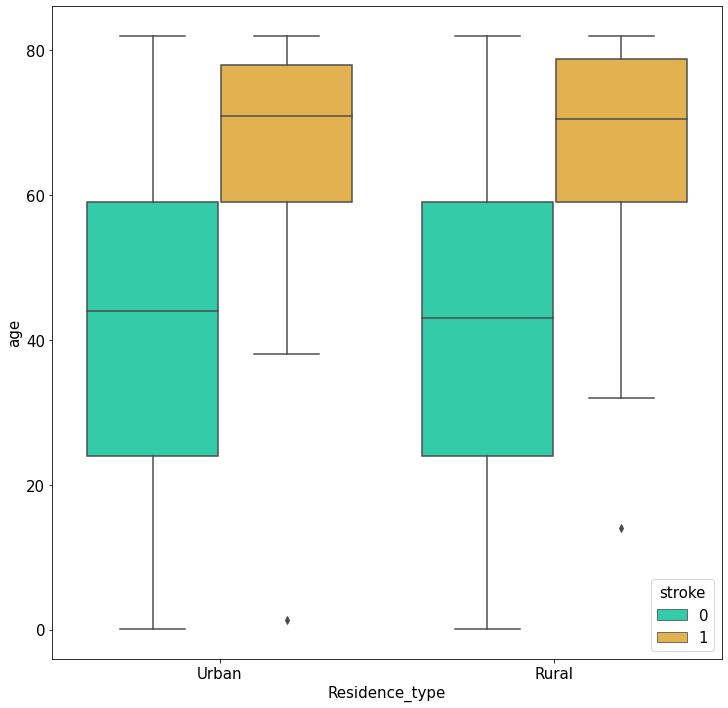

In [123]:
plt.figure(figsize=(12,12))
sns.boxplot(y='age', x='Residence_type',hue='stroke' ,data=df, palette = 'turbo')

<AxesSubplot:xlabel='heart_disease', ylabel='age'>

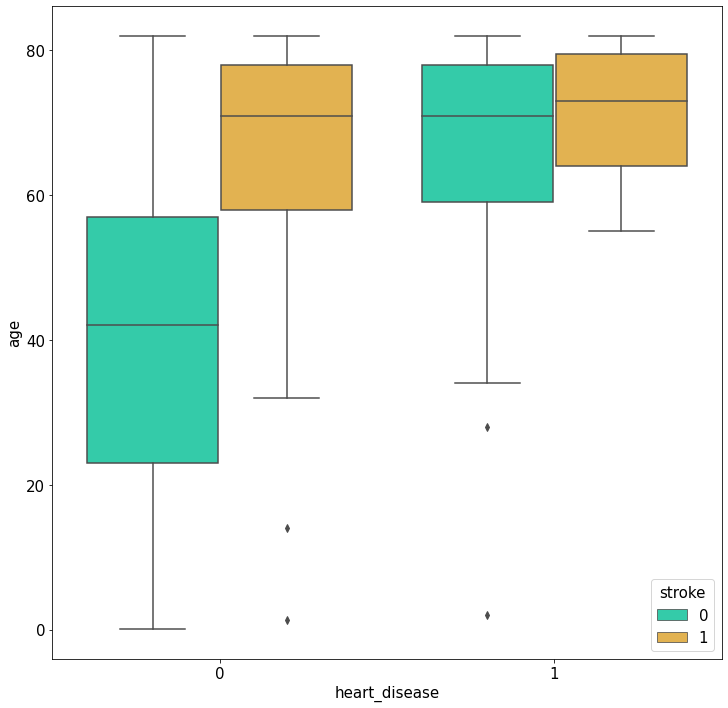

In [120]:
plt.figure(figsize=(12,12))
sns.boxplot(y='age', x='heart_disease',hue='stroke' ,data=df, palette = 'turbo')

<AxesSubplot:xlabel='gender', ylabel='age'>

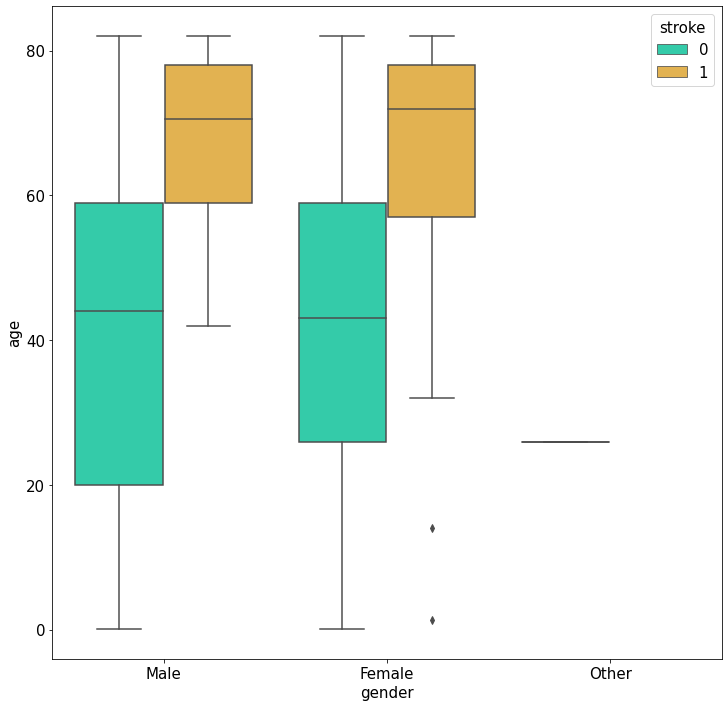

In [124]:
plt.figure(figsize=(12,12))
sns.boxplot(y='age', x='gender',hue='stroke' ,data=df, palette = 'turbo')

<AxesSubplot:xlabel='smoking_status', ylabel='avg_glucose_level'>

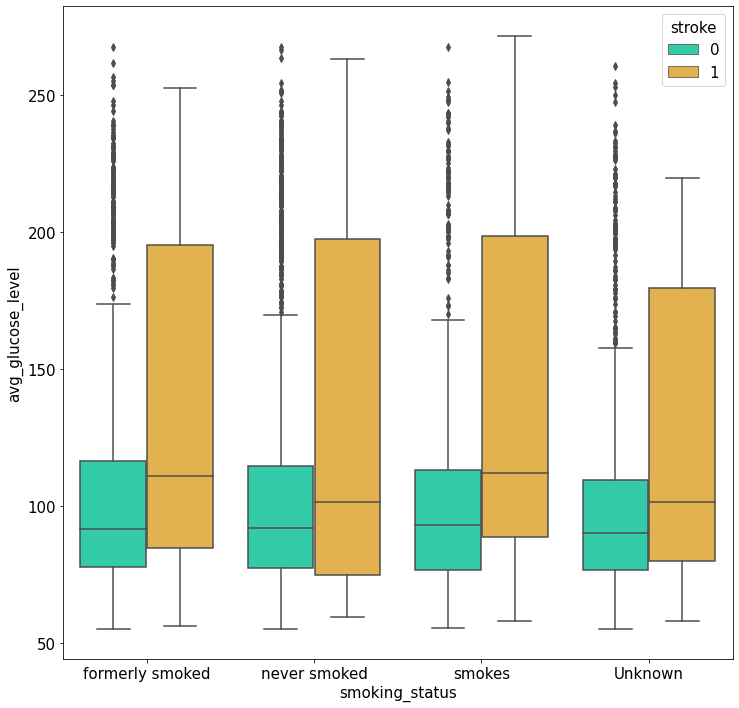

In [30]:
plt.figure(figsize=(12,12))
sns.boxplot(y='avg_glucose_level', x='smoking_status',hue='stroke' ,data=df, palette = 'turbo')

<AxesSubplot:xlabel='work_type', ylabel='count'>

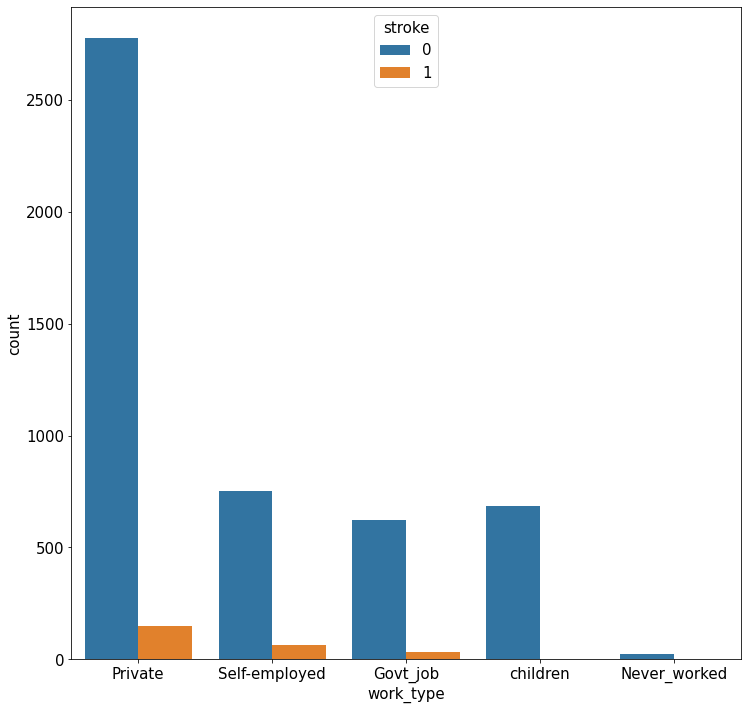

In [31]:
plt.figure(figsize=(12,12))
sns.countplot(x='work_type', hue='stroke', data=df)

In [139]:
df_num=df[['age','avg_glucose_level','bmi']]
df_cat=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

<AxesSubplot:xlabel='gender', ylabel='count'>

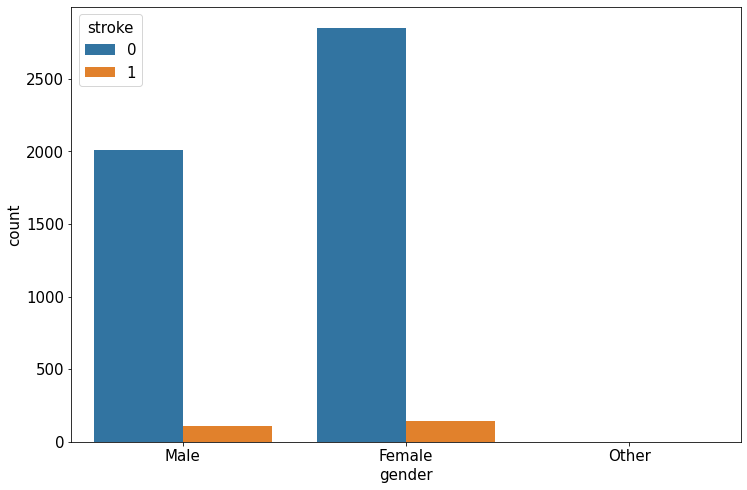

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x='gender', hue='stroke', data=df)

<AxesSubplot:xlabel='hypertension', ylabel='count'>

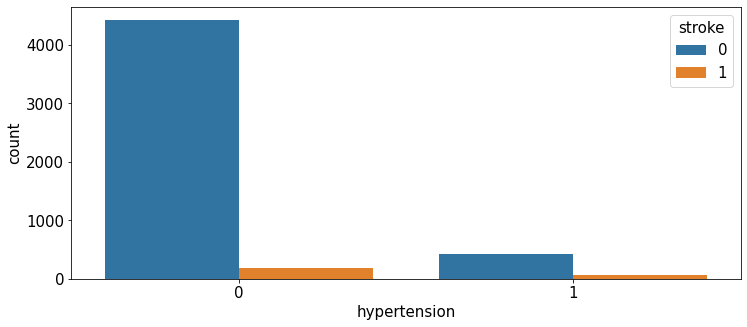

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(x='hypertension', hue='stroke', data=df)

In [37]:
df=df_copy.copy()

In [38]:
for col in df_cat:
    print(str(col))
    print(df[col].unique())

gender
['Male' 'Female' 'Other']
hypertension
[0 1]
heart_disease
[1 0]
ever_married
['Yes' 'No']
work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type
['Urban' 'Rural']
smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke
[1 0]


<Figure size 1224x504 with 0 Axes>

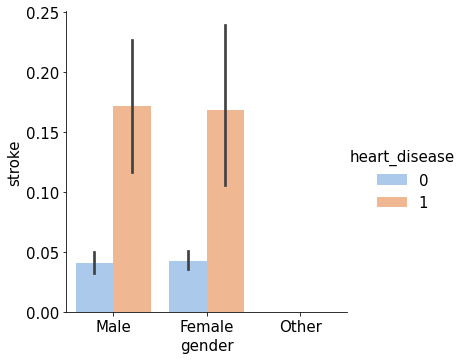

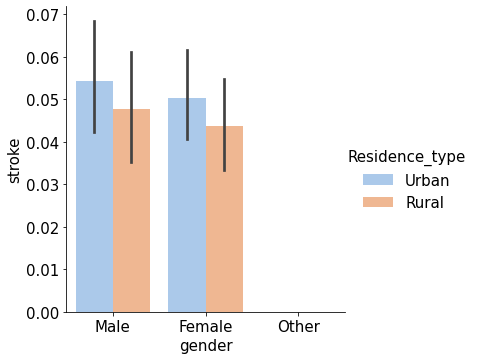

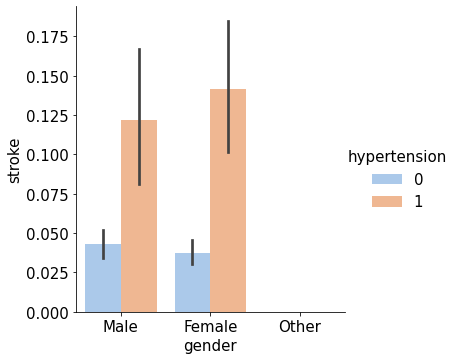

In [49]:
plt.figure(figsize=(17,7))
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=df)
plt.show()

In [51]:
df = df.drop(['id'],axis=1)

In [55]:
from sklearn.preprocessing import LabelEncoder
#  Using Lable encoding
le = LabelEncoder()
en_df = df.apply(le.fit_transform)
en_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,239,1,1
1,0,82,0,0,1,3,0,3588,475,2,1
2,1,101,0,1,1,2,0,2483,198,2,1
3,0,70,0,0,1,2,1,3385,217,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


<AxesSubplot:>

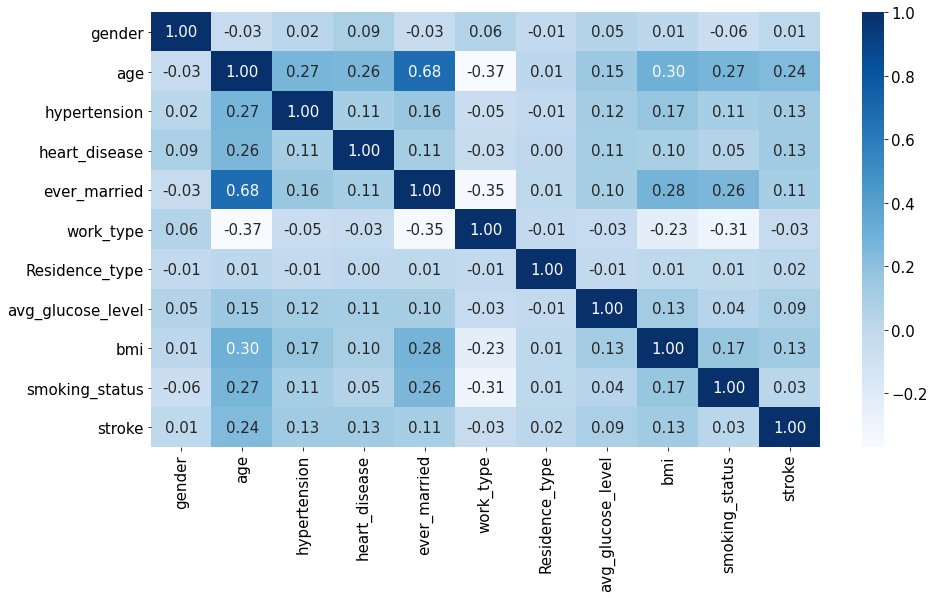

In [59]:
plt.figure(figsize=(15, 8))
sns.heatmap(en_df.corr(), cmap='Blues', annot=True, fmt='.2f')

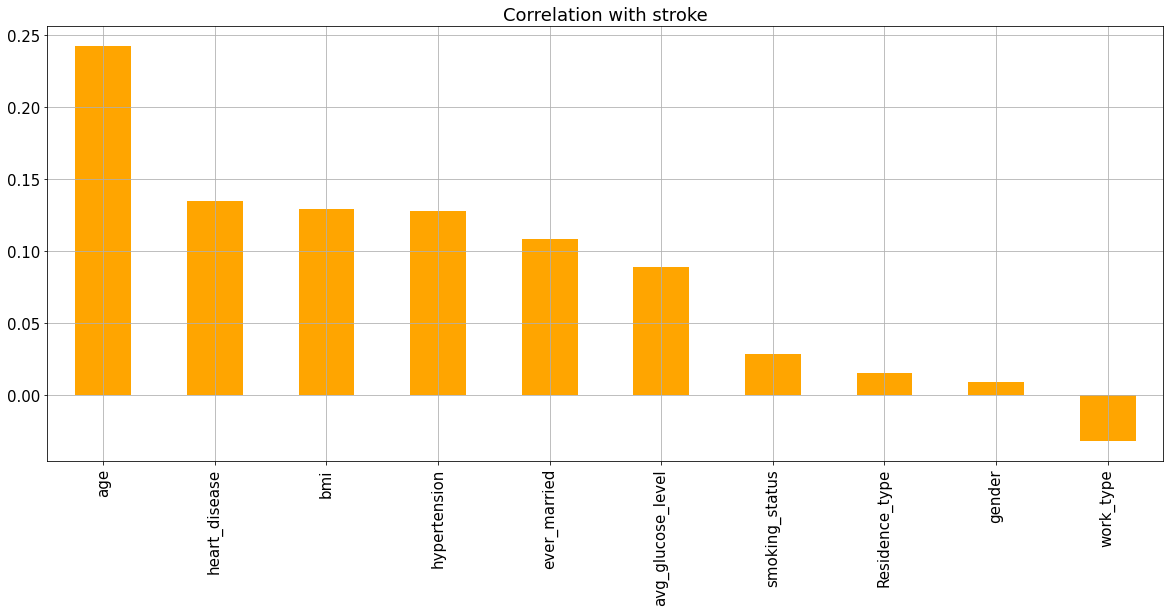

In [125]:
correl=en_df.drop('stroke', axis=1).corrwith(df.stroke)
df_c = correl.sort_values(ascending=False)
df_c.plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with stroke",color="Orange");

In [74]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import statsmodels.api as sm
import shap
from matplotlib import pyplot as plt

In [75]:
Xtrain_all = en_df[['age','heart_disease','bmi', 'hypertension', 'ever_married', 'avg_glucose_level', 'smoking_status', 
                   'Residence_type', 'gender', 'work_type']]

In [76]:
Xtrain_all=sm.add_constant(Xtrain_all)

In [77]:
X_all = en_df[['age','heart_disease','bmi', 'hypertension', 'ever_married', 'avg_glucose_level', 'smoking_status', 
                   'Residence_type', 'gender', 'work_type']]
y_all= en_df[['stroke']]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.15, random_state=12)

In [78]:
rf_all = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)
rf_all.fit(X_train_all, y_train_all.values.ravel())
# model = forest.fit(train_fold, train_y.values.ravel()

RandomForestRegressor()

In [79]:
# To get the feature importances from the Random Forest model use the feature_importances_ attribute:
rf_all.feature_importances_

array([0.19628934, 0.01959128, 0.28370501, 0.02418707, 0.0185514 ,
       0.29120653, 0.06755989, 0.02909449, 0.02841535, 0.04139964])

In [80]:
feature_names_all = ['age','heart_disease','bmi', 'hypertension', 'ever_married', 'avg_glucose_level', 'smoking_status', 
                   'Residence_type', 'gender', 'work_type']
list_of_tuples = list(zip(feature_names_all, rf_all.feature_importances_))
   
# Assign data to tuples.
list_of_tuples 
 
 
# Converting lists of tuples into
# pandas Dataframe.
df_fim_all = pd.DataFrame(list_of_tuples,
                  columns = ['feature_names_all', 'rf_all_feature_importances_'])
df_fim_all.sort_values(by=['rf_all_feature_importances_'], inplace=True, ascending=False)   
# Print data.
print(df_fim_all)

   feature_names_all  rf_all_feature_importances_
5  avg_glucose_level                     0.291207
2                bmi                     0.283705
0                age                     0.196289
6     smoking_status                     0.067560
9          work_type                     0.041400
7     Residence_type                     0.029094
8             gender                     0.028415
3       hypertension                     0.024187
1      heart_disease                     0.019591
4       ever_married                     0.018551


In [ ]:
# df_cat=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
#                        'smoking_status', 'stroke']]

In [183]:
data=df

<AxesSubplot:xlabel='hypertension', ylabel='prop'>

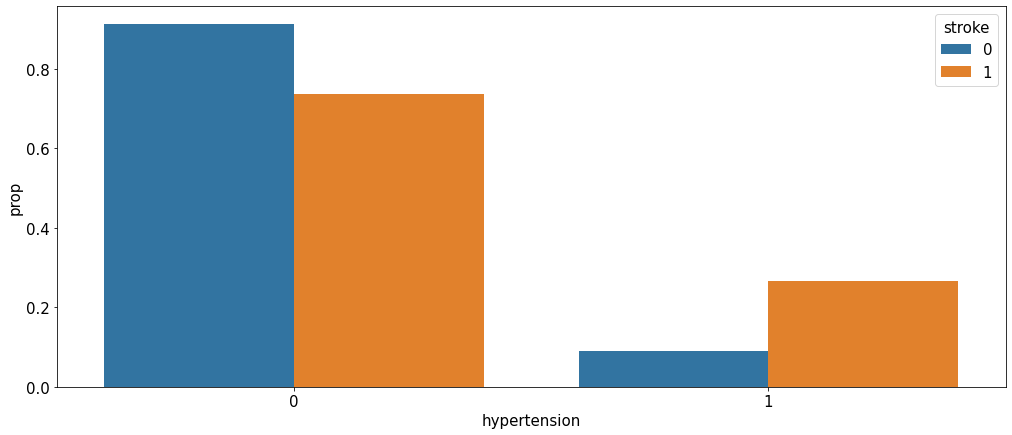

In [175]:
x, y, hue = "hypertension", "prop", "stroke"
hue_order = ["stroke", "no_stroke"]
plt.figure(figsize=(17,7))
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<AxesSubplot:xlabel='heart_disease', ylabel='prop'>

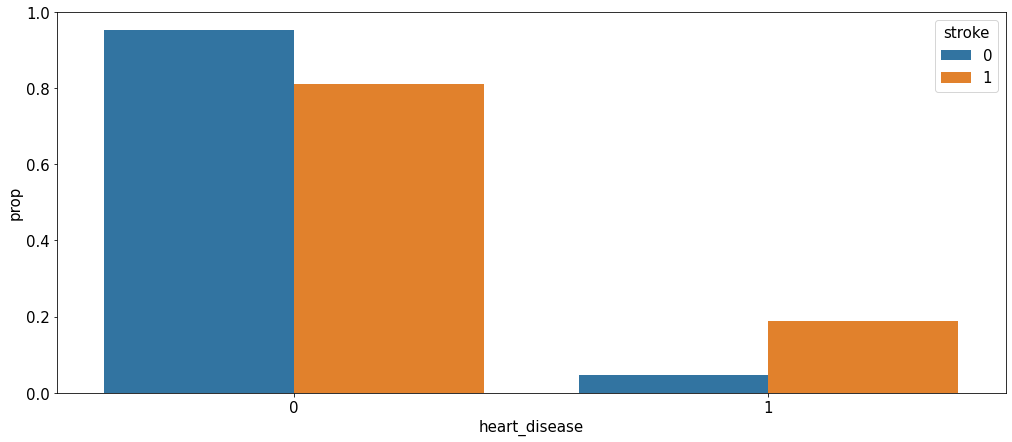

In [168]:
x, y, hue = "heart_disease", "prop", "stroke"
hue_order = ["stroke", "no_stroke"]
plt.figure(figsize=(17,7))
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<AxesSubplot:xlabel='ever_married', ylabel='prop'>

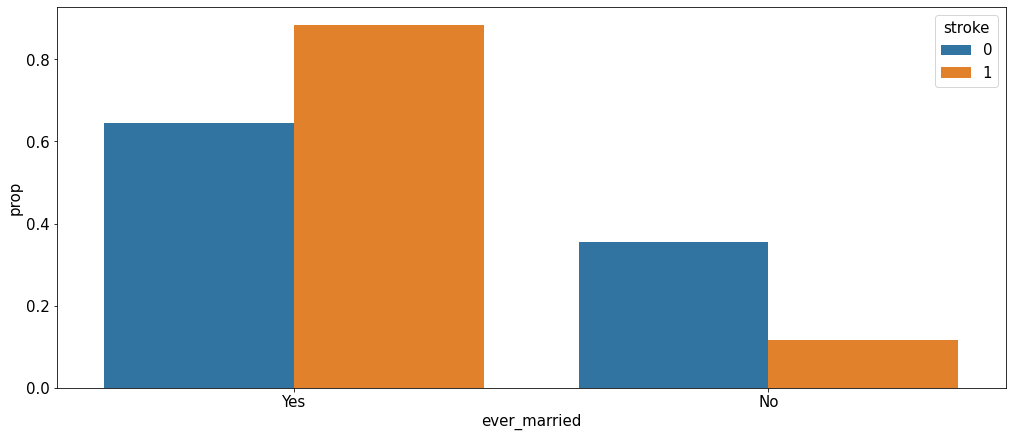

In [170]:
x, y, hue = "ever_married", "prop", "stroke"
hue_order = ["stroke", "no_stroke"]
plt.figure(figsize=(17,7))
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<AxesSubplot:xlabel='work_type', ylabel='prop'>

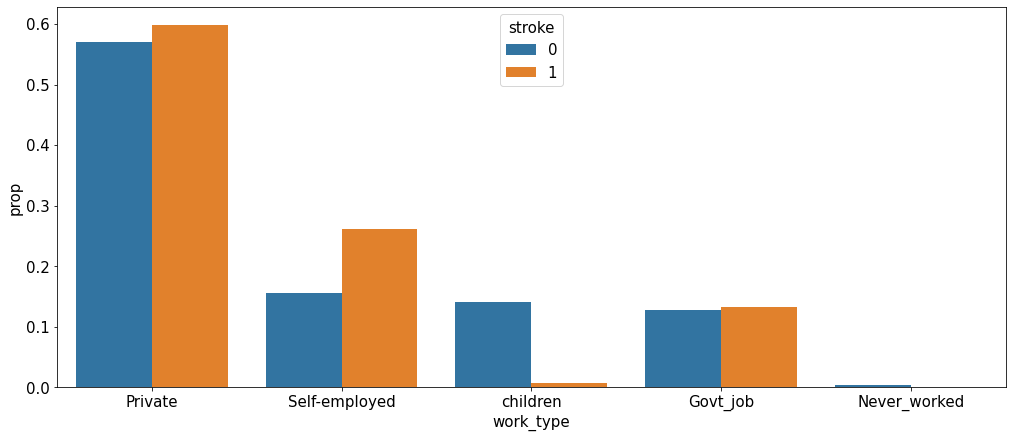

In [171]:
x, y, hue = "work_type", "prop", "stroke"
hue_order = ["stroke", "no_stroke"]
plt.figure(figsize=(17,7))
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<AxesSubplot:xlabel='smoking_status', ylabel='prop'>

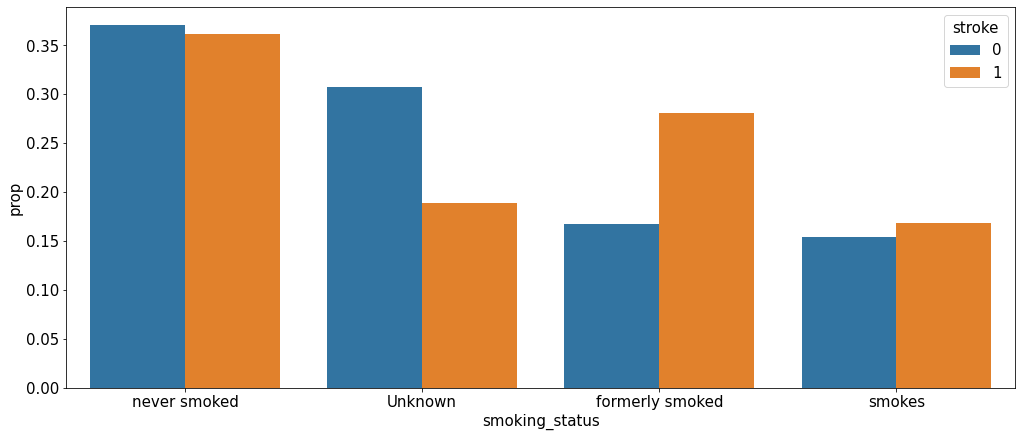

In [192]:
x, y, hue = "smoking_status", "prop", "stroke"
hue_order = ["stroke", "no_stroke"]
plt.figure(figsize=(17,7))
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<AxesSubplot:xlabel='smoking_status', ylabel='age'>

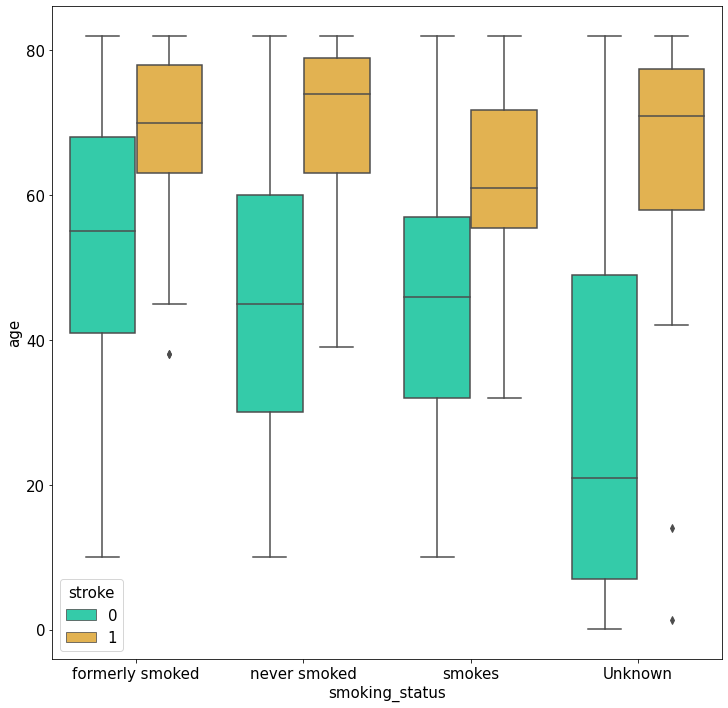

In [189]:
plt.figure(figsize=(12,12))
sns.boxplot(y='age', x='smoking_status',hue='stroke' ,data=df, palette = 'turbo')

<AxesSubplot:xlabel='Residence_type', ylabel='prop'>

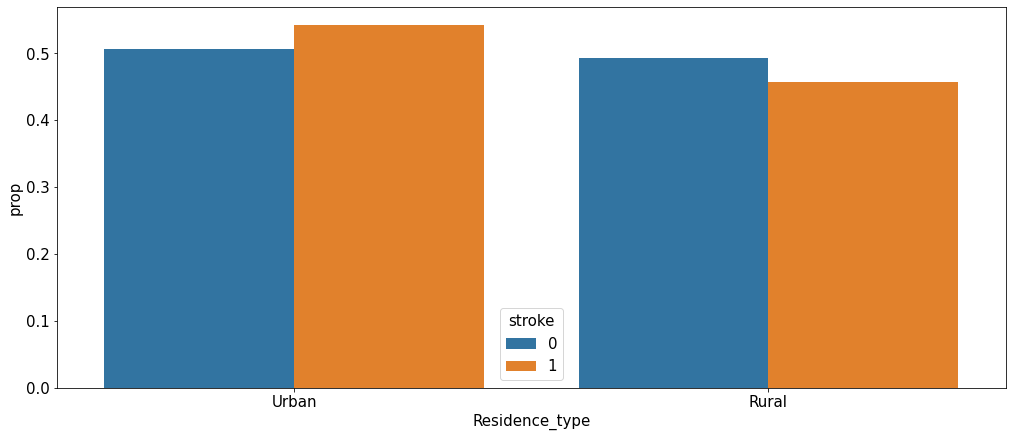

In [188]:
x, y, hue = "Residence_type", "prop", "stroke"
hue_order = ["stroke", "no_stroke"]
plt.figure(figsize=(17,7))
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<AxesSubplot:xlabel='gender', ylabel='prop'>

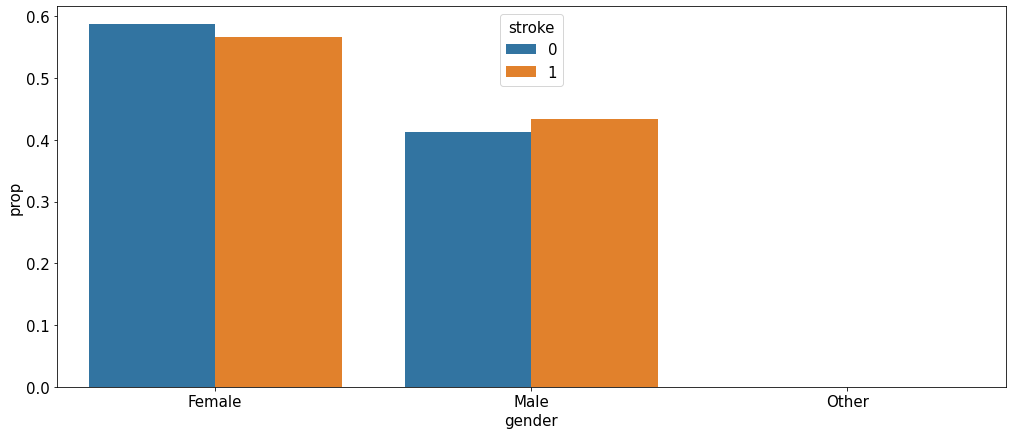

In [195]:
x, y, hue = "gender", "prop", "stroke"
x_order = ["Male", "Female", "Other"]
plt.figure(figsize=(17,7))
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

In [142]:
# Classifying data into numerical and categorical variables.
df_num=df[['age','avg_glucose_level','bmi']]
df_cat=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]